In [7]:
import cv2
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from glob import glob
import os 

### Reading images

In [8]:
root_dir = os.getcwd()
print(root_dir)
catFiles = glob(root_dir+r'/test_set/cats/*.jpg')
dogFiles = glob(root_dir+r'/test_set/dogs/*.jpg')
catFiles[20]

/Users/linlinhlaing/Downloads/download/AI/github codes/image-processing-practice


'/Users/linlinhlaing/Downloads/download/AI/github codes/image-processing-practice/test_set/cats/cat.4751.jpg'

In [9]:
img_mpl = plt.imread(catFiles[20])
img_cv2 = cv2.imread(catFiles[20])
print(type(img_mpl),type(img_cv2))
print(img_mpl.shape,img_cv2.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(499, 333, 3) (499, 333, 3)


### Image Array

(Height , Width, Channels)


<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height:200px;width:600px;"/>

<Axes: title={'center': 'Distribution of pixel values'}, ylabel='Frequency'>

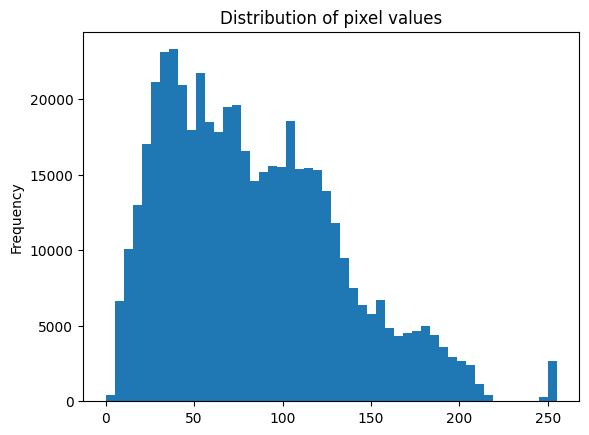

In [10]:
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=50,title="Distribution of pixel values")

### Display images

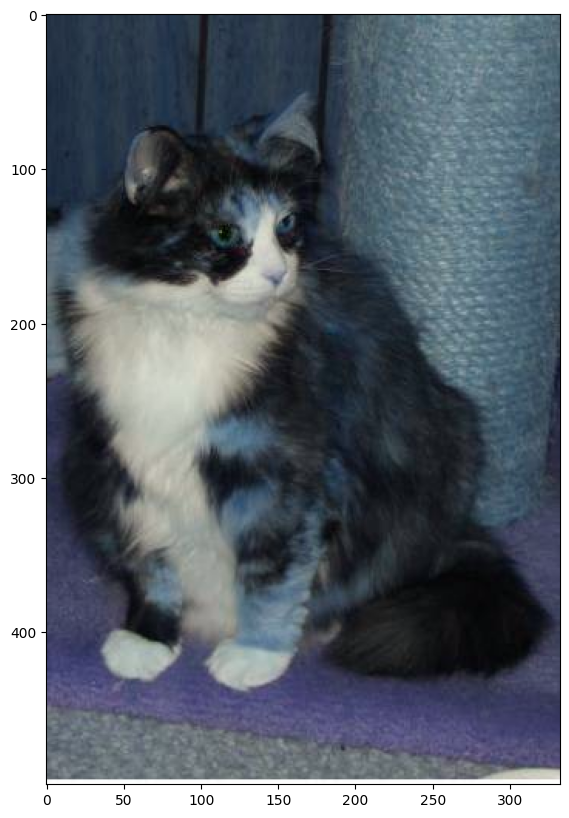

In [11]:
fig,ax = plt.subplots(figsize =(10,10))
ax.imshow(img_cv2)
plt.show()
# plt.imshow(img_cv2)

### Display RGB Channels of our image

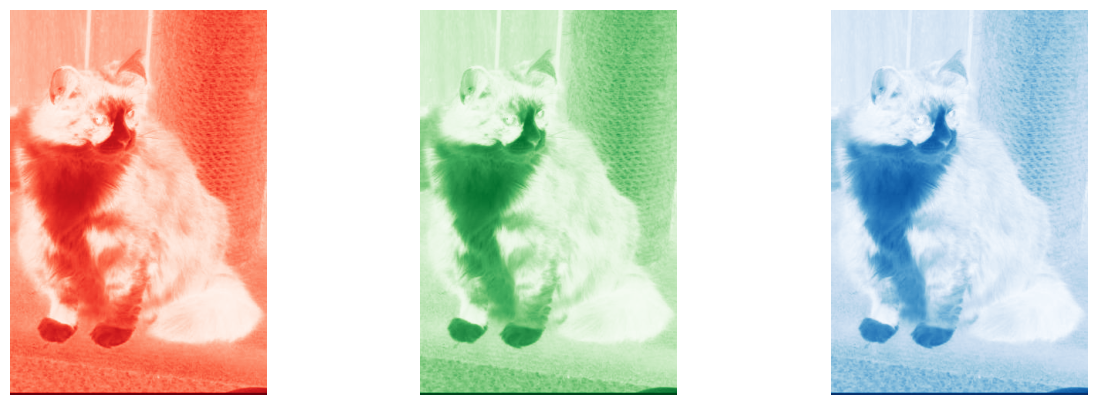

In [12]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].imshow(img_mpl[:,:,0],cmap= 'Reds')
axs[1].imshow(img_mpl[:,:,1],cmap= 'Greens')
axs[2].imshow(img_mpl[:,:,2],cmap = 'Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### Matplotlib vs cv2 Numpy Arrays
- cv2 reads in channels as BGR
- matplotlib reads in channels RGB

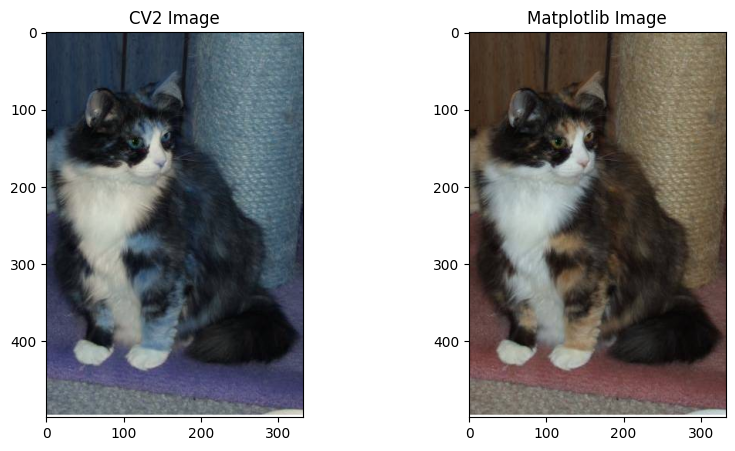

In [13]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title("CV2 Image")
axs[1].set_title("Matplotlib Image")
plt.show()

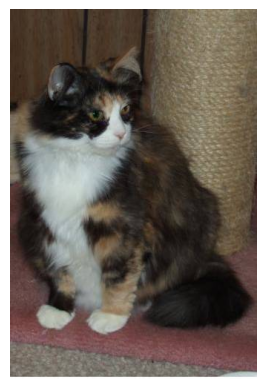

In [14]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()
# plt.imshow(img_cv2_rgb)

### Image manipulation with cv2

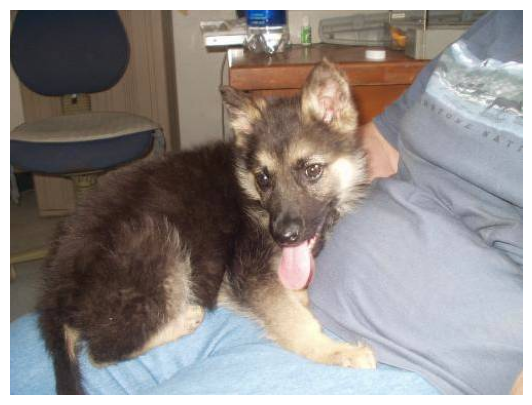

In [26]:
img = plt.imread(dogFiles[20])
fig,ax = plt.subplots(figsize = (10,5))
ax.imshow(img)
ax.axis('off')
plt.show()

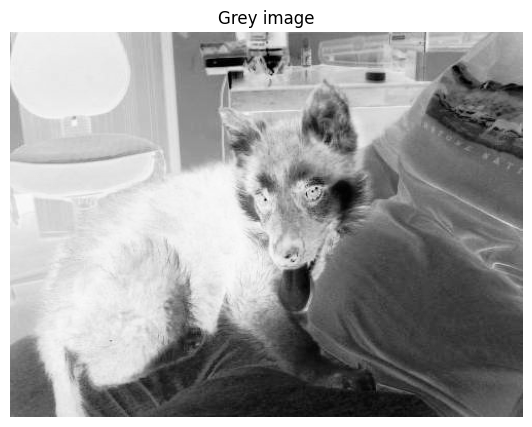

In [27]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fig ,ax = plt.subplots(figsize = (10,5))
ax.imshow(img_gray,cmap = 'Greys')
ax.axis('off')
ax.set_title("Grey image")
plt.show()

### Resizing and Scaling using cv2

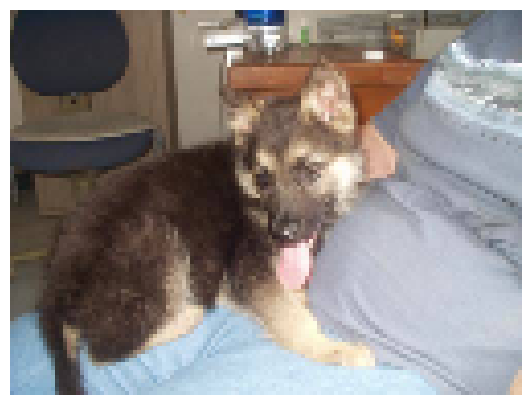

In [28]:
img_resized = cv2.resize(img,None,fx=0.25,fy=0.25)
fig,ax = plt.subplots(figsize = (10,5))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

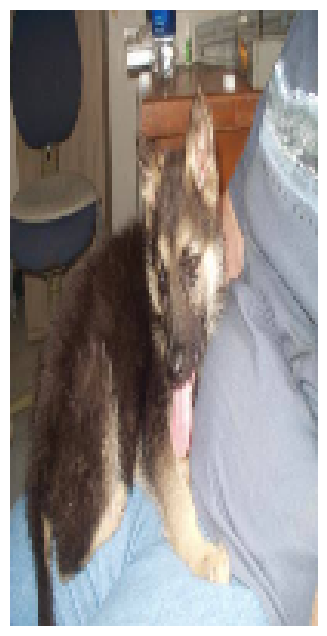

In [29]:
#Differnt
img_resize = cv2.resize(img,(100,200))
fig,ax = plt.subplots(figsize = (8,8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

### Upscaling in resizing
- need to identify interpolate type when upscaling in order to know how to stretch 
these pixels out from their original size  

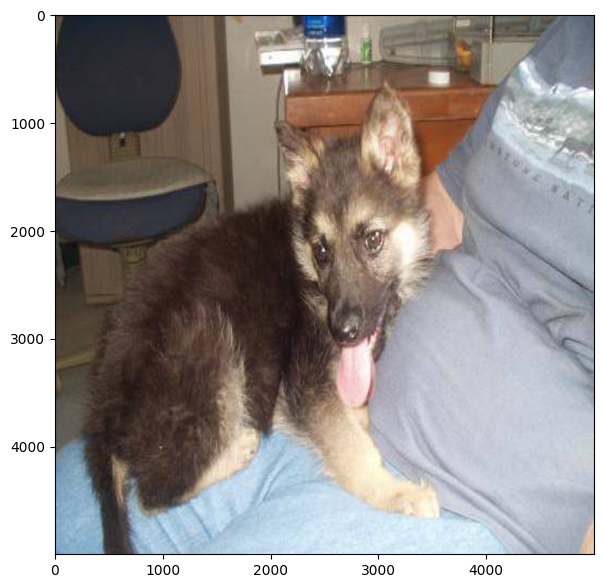

In [30]:
img_resize = cv2.resize(img,(5000,5000),interpolation = cv2.INTER_CUBIC)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(img_resize)
# ax.axis('off')
plt.show()

In [20]:
img_resize.shape,img.shape

((5000, 5000, 3), (375, 499, 3))

### CV2 Kernels
<img src = "https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt = "imgpixels" style = "width:400px;">

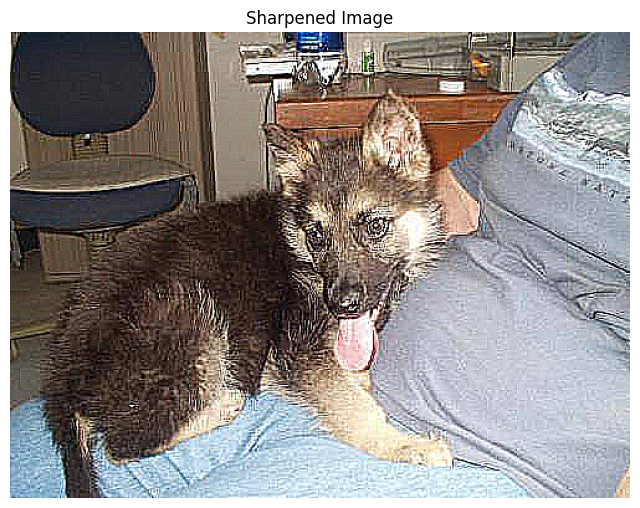

In [22]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]])

sharpened_image = cv2.filter2D(img, -1, kernel_sharpening)
fig,ax = plt.subplots(figsize = (8,8))
ax.imshow(sharpened_image)
ax.axis('off')
ax.set_title("Sharpened Image")
plt.show()

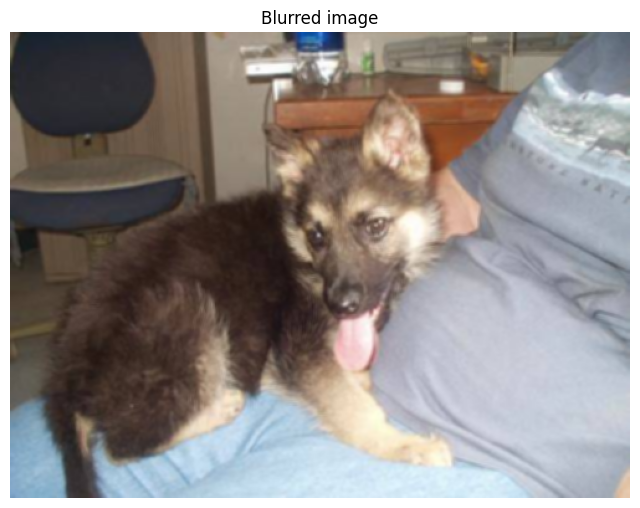

In [33]:
# Blurring the image
kernel_3x3 = np.ones((3,3),np.float32)/9
blurred_image = cv2.filter2D(img,-1,kernel_3x3)
fig,ax = plt.subplots(figsize =(8,8))
ax.imshow(blurred_image)
ax.set_title("Blurred image")
ax.axis('off')
plt.show()

### Save Image

In [35]:
plt.imsave('mpl_dog.png',blurred_image)
cv2.imwrite('cv2_dog.png',blurred_image)

True

### End